# Introduction
Bellabeat is a high-tech wellness company that designs smart products focused on women’s health. Founded in 2013 by Urška Sršen and Sando Mur, Bellabeat has developed a range of devices — such as the Leaf, Time, and Spring — that connect to the Bellabeat app to help users monitor activity, sleep, stress, and overall well-being.

As a junior data analyst on Bellabeat’s marketing analytics team, the goal of this project is to analyze publicly available Fitbit fitness tracker data to uncover usage patterns and behavioral trends. These insights will then be used to inform marketing strategies for one of Bellabeat’s flagship products, the Bellabeat app.

**Analytical Framework**

The analysis follows the six-step of Data Analytics process:

| Step        | Description                           | Deliverable         |
| ----------- | ------------------------------------- | ------------------- |
| **Ask**     | Define the business task              | Business questions  |
| **Prepare** | Load and inspect data                 | Data overview       |
| **Process** | Clean and transform data              | Clean dataset       |
| **Analyze** | Explore, visualize, and find insights | Charts and trends   |
| **Share**   | Summarize findings                    | Visual storytelling |
| **Act**     | Recommend marketing strategies        | Actionable insights |


# 1. Ask — Define the Business Task

**Business Task:**
Analyze trends in how people use smart fitness devices and determine how these insights can help Bellabeat refine its marketing strategy for one product — e.g., the Bellabeat app.

**Key Questions:**



1. What are the main trends in smart device usage?
2. How can these trends apply to Bellabeat customers?
3. How can these insights inform Bellabeat’s marketing strategy?



# 2. Prepare — Data Source & Credibility

**Tools & Packages**

This analysis is performed in R using the following key packages:


* tidyverse — Data cleaning, wrangling, and visualization
* lubridate — Date and time manipulation
* dplyr — Efficient data manipulation
* ggplot2 — Data visualization
* tidyr — Data reshaping and pivoting

In [1]:

# Load libraries
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Dataset:**
[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit/data)

30 participants

Tracks activity, sleep, steps, calories

Public, open license (CC0)

**Credibility Check (ROCCC):**

> **Reliable:** Data from real Fitbit devices

> **Original:** Uploaded by a trusted Kaggle source

> **Comprehensive:** Covers multiple health aspects, but only 30 participants.

> **Current:** 2016 (not recent, but suitable for trend insights)

> **Cited:** Properly referenced in Kaggle dataset page

In [2]:
# Load datasets
activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_steps <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

# Check duplicates
sum(duplicated(activity))
sum(duplicated(sleep))

# Overview
glimpse(activity)
summary(activity)


[1] 0

[1] 3

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

# 3. Process — Data Cleaning and Transformation

In [3]:
# Convert date columns
activity$ActivityDate <- as.Date(activity$ActivityDate, format="%m/%d/%Y")
sleep$SleepDay <- as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p")
sleep$date <- as.Date(sleep$SleepDay)
hourly_steps$ActivityHour <- as.POSIXct(hourly_steps$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")

# Add weekday
activity$weekday <- weekdays(activity$ActivityDate)
sleep$weekday <- wday(sleep$date, label = TRUE, abbr = FALSE)

activity <- activity %>%
  mutate(TotalActiveMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)

# Verify missing values
colSums(is.na(activity))

Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0 
                 weekday       TotalActiveMinutes 
                       0                        0


* Clean, consistent date formats
* Weekday variable for time-based trend analysis
* Verified no significant missing data


#  4. Analyze — Explore and Visualize
**4.1 Relationship between steps and calories**

[1] 0.5915681

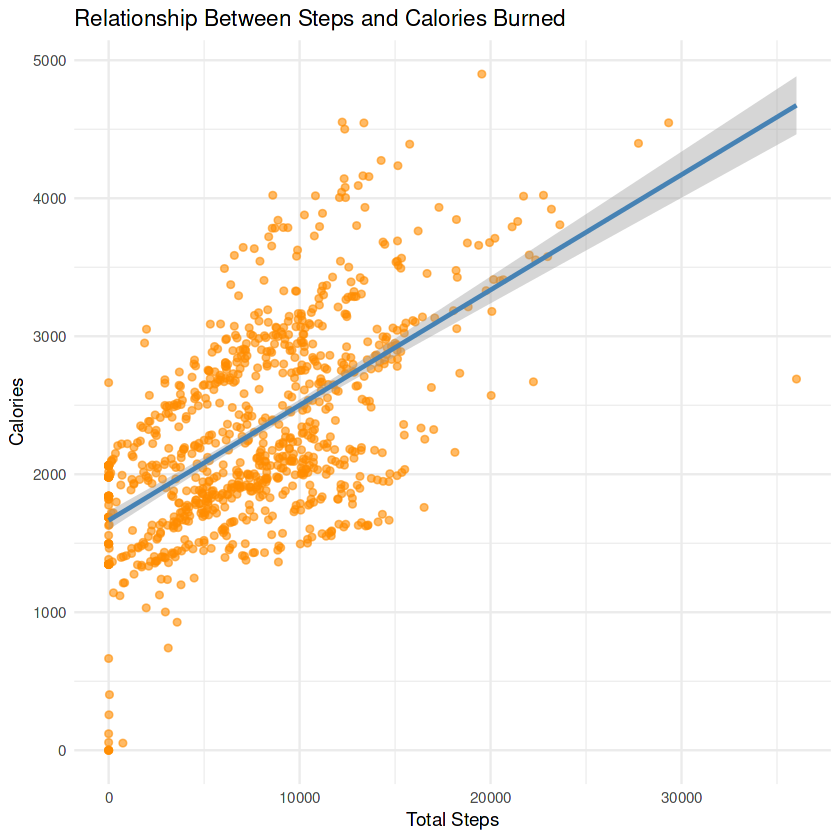

In [4]:
ggplot(activity, aes(x = TotalSteps, y = Calories)) +
  geom_point(alpha = 0.6, color = "darkorange") +
  geom_smooth(method = "lm", formula = y ~ x, color = "steelblue") +
  labs(title = "Relationship Between Steps and Calories Burned",
       x = "Total Steps", y = "Calories") +
  theme_minimal()
cor(activity$TotalSteps, activity$Calories)

**Insight:** Strong positive correlation suggests higher step count directly drives calorie burn — an actionable metric for app goal-setting.

**4.2 Relationship Between Activity Intensity and Calories**

In [5]:
corr_data <- activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories)
cor_matrix <- round(cor(corr_data, use = "complete.obs"), 2)
cor_matrix

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
VeryActiveMinutes,1.00,0.31,0.05,-0.16,0.62
FairlyActiveMinutes,0.31,1.00,0.15,-0.24,0.30
LightlyActiveMinutes,0.05,0.15,1.00,-0.44,0.29
SedentaryMinutes,-0.16,-0.24,-0.44,1.00,-0.11
Calories,0.62,0.30,0.29,-0.11,1.00


**4.3 Daily Active Minutes Distribution**

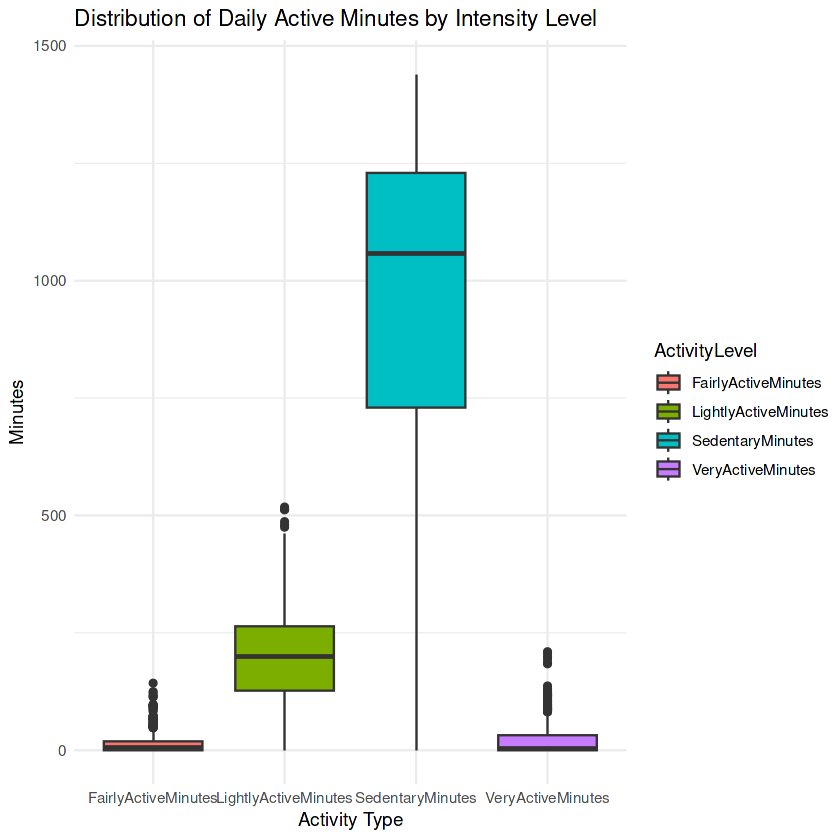

In [6]:
activity_long <- activity %>%
  select(ActivityDate, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>%
  pivot_longer(cols = -ActivityDate, names_to = "ActivityLevel", values_to = "Minutes")

ggplot(activity_long, aes(x = ActivityLevel, y = Minutes, fill = ActivityLevel)) +
  geom_boxplot() +
  labs(title = "Distribution of Daily Active Minutes by Intensity Level",
       x = "Activity Type", y = "Minutes") +
  theme_minimal()

**Insight:** Sedentary time dominates — opportunity for wellness challenges encouraging light movement breaks.

**4.4 Average Activity by Weekday**

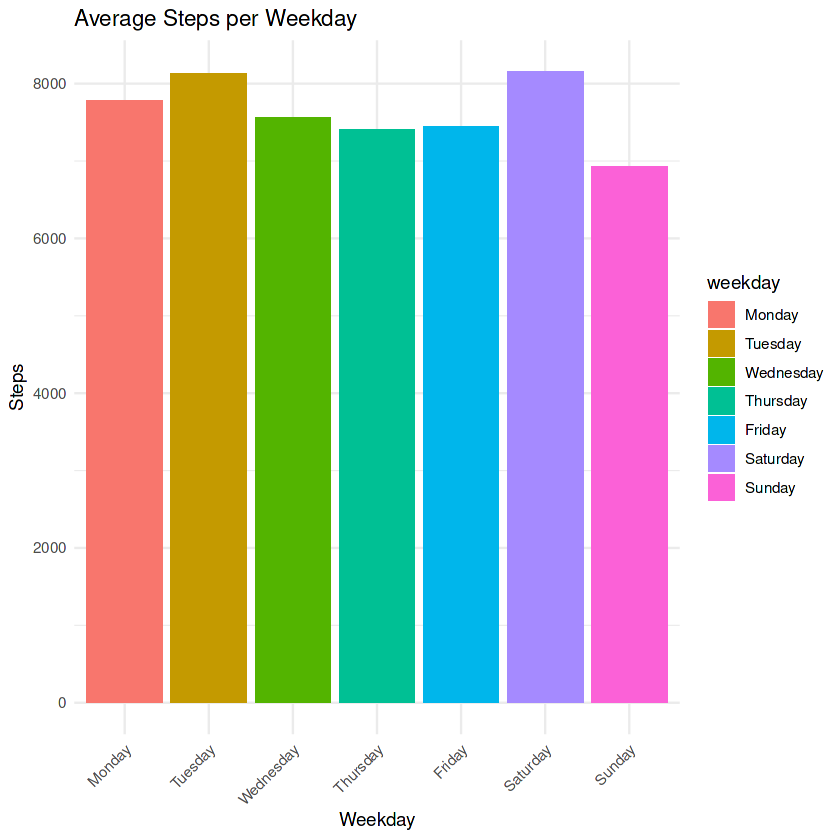

In [7]:
avg_activity <- activity %>%
  group_by(weekday) %>%
  summarise(
    avg_calories = mean(Calories, na.rm = TRUE),
    avg_steps = mean(TotalSteps, na.rm = TRUE),
    .groups = "drop"
  )

#Change the order of the week days
avg_activity$weekday <- factor(avg_activity$weekday,
  levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

ggplot(avg_activity, aes(x = weekday, y = avg_steps, fill = weekday)) +
  geom_col() +
  labs(title = "Average Steps per Weekday", x = "Weekday", y = "Steps") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**4.5 Steps by Hour of Day**

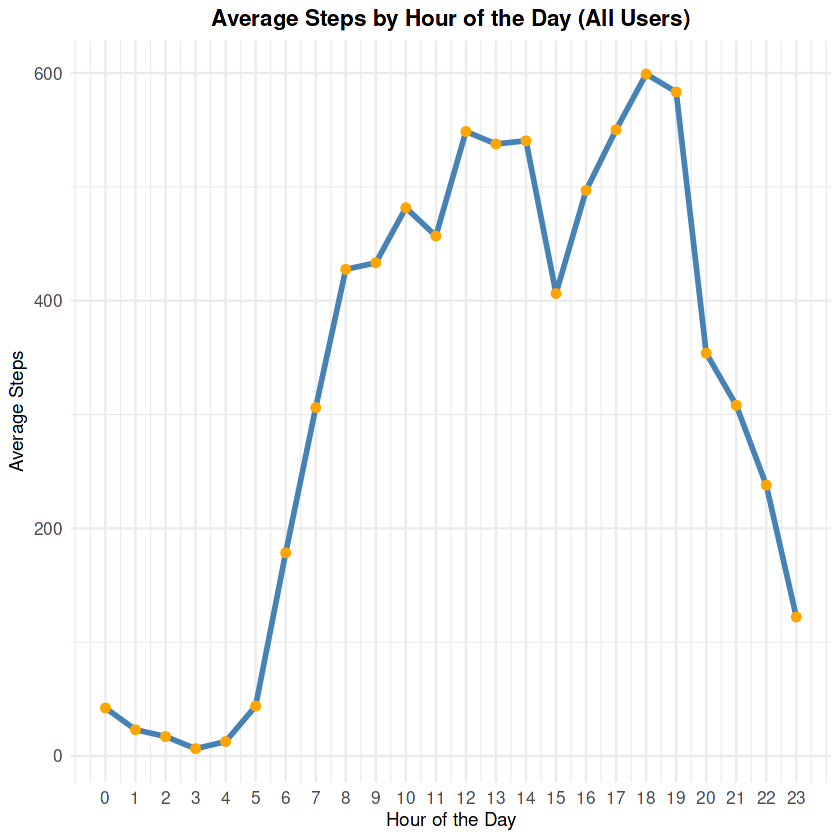

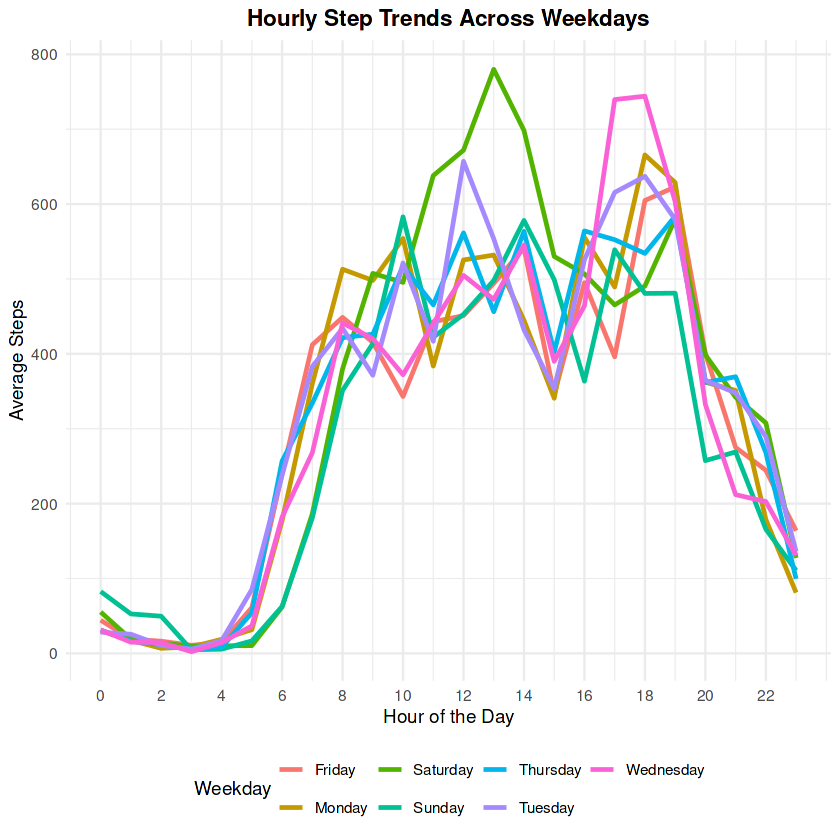

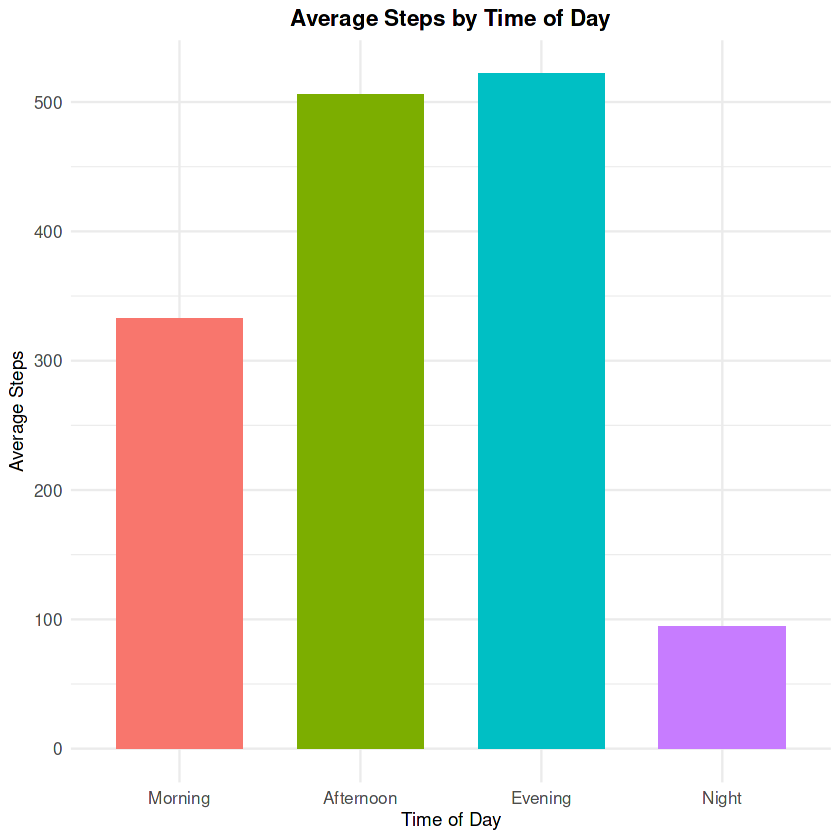

In [8]:
# Convert ActivityHour to POSIXct (date-time)
hourly_steps$ActivityHour <- as.POSIXct(hourly_steps$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p")

# Extract the hour of the day (0–23)
hourly_steps$hour <- hour(hourly_steps$ActivityHour)

# Extract weekday for additional analysis
hourly_steps$weekday <- weekdays(hourly_steps$ActivityHour)

# --- Average Steps by Hour (All Users) ---
avg_steps_by_hour <- hourly_steps %>%
  group_by(hour) %>%
  summarise(
    avg_steps = mean(StepTotal, na.rm = TRUE),
    .groups = "drop"
  )

# Line plot of average steps per hour
ggplot(avg_steps_by_hour, aes(x = hour, y = avg_steps)) +
  geom_line(color = "steelblue", linewidth = 1.2) +
  geom_point(color = "orange", size = 2) +
  labs(
    title = "Average Steps by Hour of the Day (All Users)",
    x = "Hour of the Day",
    y = "Average Steps"
  ) +
  scale_x_continuous(breaks = 0:23) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text = element_text(size = 10)
  )

# --- Average Steps by Hour, Faceted by Weekday ---
avg_steps_by_hour_day <- hourly_steps %>%
  group_by(weekday, hour) %>%
  summarise(avg_steps = mean(StepTotal, na.rm = TRUE), .groups = "drop")

# Faceted line plot showing daily hourly step patterns
ggplot(avg_steps_by_hour_day, aes(x = hour, y = avg_steps, color = weekday, group = weekday)) +
  geom_line(linewidth = 1) +
  labs(
    title = "Hourly Step Trends Across Weekdays",
    x = "Hour of the Day",
    y = "Average Steps",
    color = "Weekday"
  ) +
  scale_x_continuous(breaks = seq(0, 23, 2)) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text = element_text(size = 9)
  )

# --- Categorize Hours into Time Periods ---
hourly_steps <- hourly_steps %>%
  mutate(period = case_when(
    hour >= 5 & hour < 12 ~ "Morning",
    hour >= 12 & hour < 17 ~ "Afternoon",
    hour >= 17 & hour < 21 ~ "Evening",
    TRUE ~ "Night"
  ))

# Calculate average steps by time of day
avg_steps_period <- hourly_steps %>%
  group_by(period) %>%
  summarise(avg_steps = mean(StepTotal, na.rm = TRUE), .groups = "drop")

# Order the time periods logically
avg_steps_period$period <- factor(avg_steps_period$period,
                                  levels = c("Morning", "Afternoon", "Evening", "Night"))

# --- Bar Chart: Average Steps by Time of Day ---
ggplot(avg_steps_period, aes(x = period, y = avg_steps, fill = period)) +
  geom_col(width = 0.7) +
  labs(
    title = "Average Steps by Time of Day",
    x = "Time of Day",
    y = "Average Steps"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text = element_text(size = 10)
  )


**4.6 Sleep vs Activity Correlation**

[1] -0.09854146

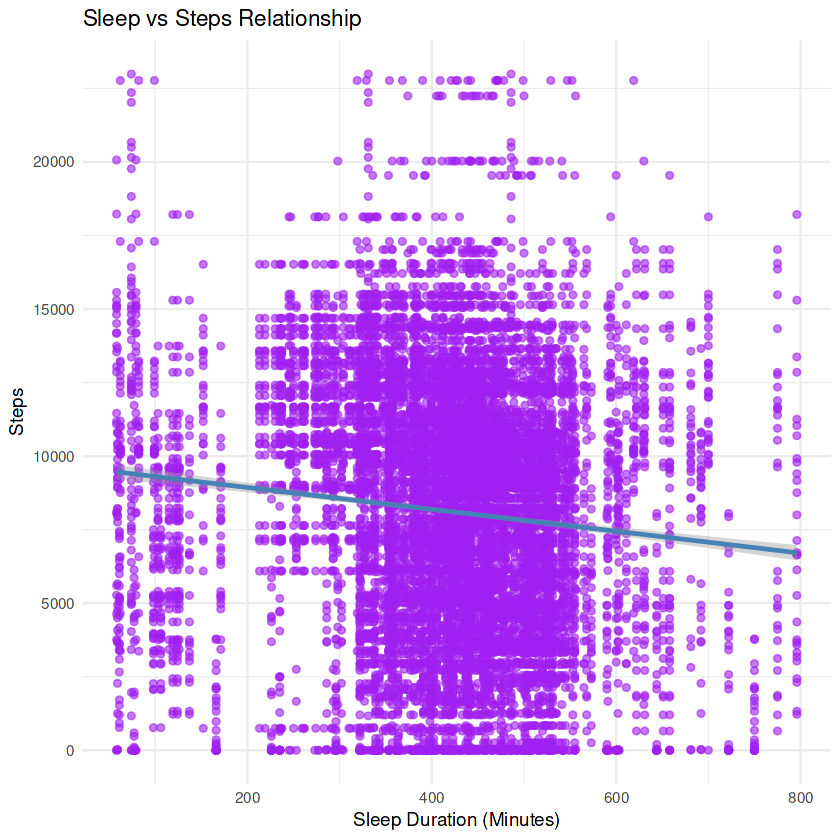

In [9]:
merged_sleep_activity <- merge(sleep, activity, by.x = "Id", by.y = "Id")
ggplot(merged_sleep_activity, aes(x = TotalMinutesAsleep, y = TotalSteps)) +
  geom_point(alpha = 0.6, color = "purple") +
  geom_smooth(method = "lm",formula = y ~ x, color = "steelblue") +
  labs(title = "Sleep vs Steps Relationship",
       x = "Sleep Duration (Minutes)", y = "Steps") +
  theme_minimal()

cor(merged_sleep_activity$TotalMinutesAsleep, merged_sleep_activity$TotalSteps, use = "complete.obs")


**4.7 Weight & BMI Analysis**

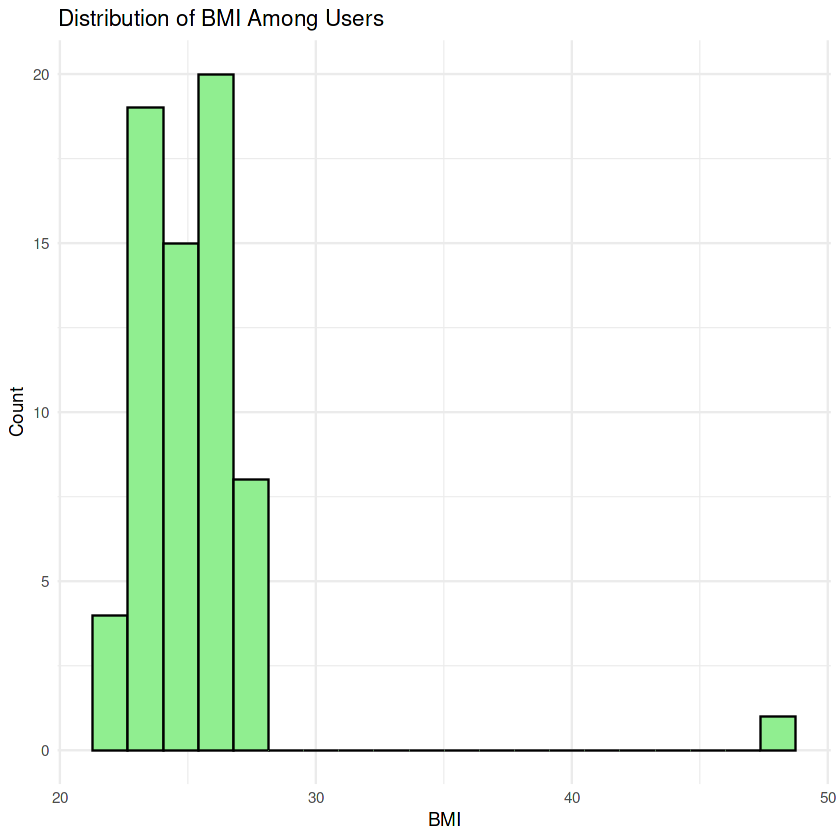

In [10]:
ggplot(weight, aes(x = BMI)) +
  geom_histogram(fill = "lightgreen", color = "black", bins = 20) +
  labs(title = "Distribution of BMI Among Users", x = "BMI", y = "Count") +
  theme_minimal()


**4.8 Sedentary Behavior Patterns**

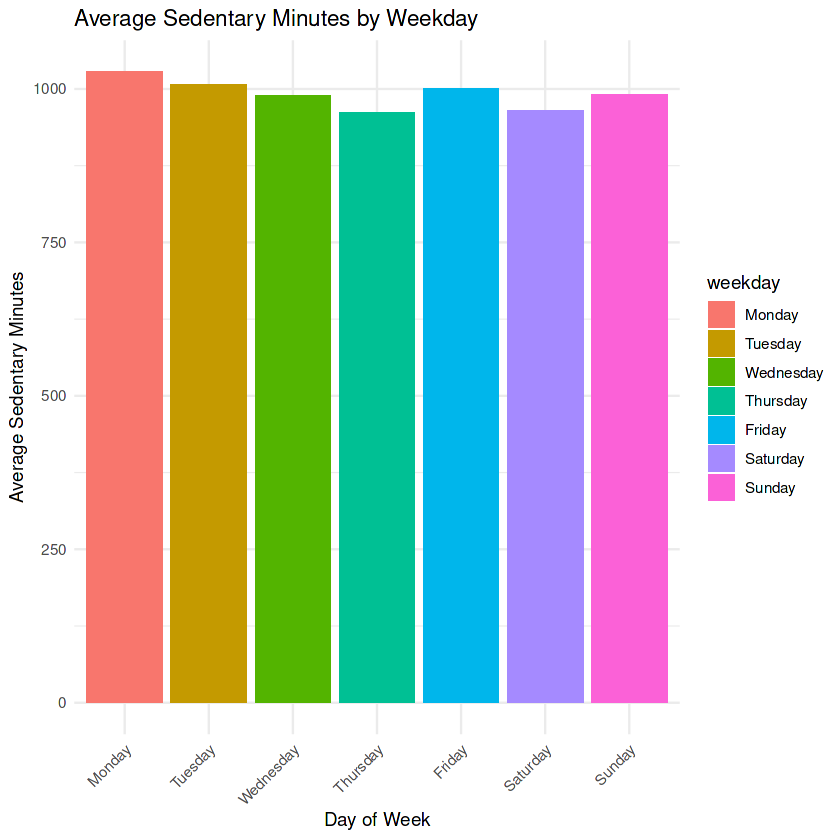

In [11]:
avg_sedentary <- activity %>%
  group_by(weekday) %>%
  summarise(avg_sedentary = mean(SedentaryMinutes, na.rm = TRUE))


#Change the order of the week days
avg_sedentary$weekday <- factor(avg_sedentary$weekday,
  levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

ggplot(avg_sedentary, aes(x = weekday, y = avg_sedentary, fill = weekday)) +
  geom_col() +
  labs(title = "Average Sedentary Minutes by Weekday",
       x = "Day of Week", y = "Average Sedentary Minutes") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


**Insight:** Sedentary behavior peaks midweek — perfect time to push app reminders or mindfulness breaks.

# 5. Share — Key Insights & Visualization Summary

**Findings:**


* Peak activity occurs midweek (Tuesday–Saturday).
* Most steps are taken during daytime hours (7 AM–7 PM).
* Sleep duration averages ~7 hours, slightly lower on weekends.
* Light activity dominates overall movement patterns.


**Interpretation:**
Users are most active during workdays, suggesting opportunities for weekday engagement campaigns and motivational weekend challenges through the Bellabeat app.

| Insight                                                | Implication                                                |
| ------------------------------------------------------ | ---------------------------------------------------------- |
| Strong positive correlation between steps and calories | Promote daily step goals in Bellabeat app                  |
| Sedentary minutes dominate daily time                  | Encourage micro-activity reminders                         |
| Sleep shows mild positive link to next-day steps       | Promote recovery and sleep-tracking features               |
| Peak step hours: 7 AM – 7 PM                           | Schedule motivational app notifications during these times |
| Weekday activity > weekend activity                    | Weekend wellness challenges                                |


# 6.Act

| Strategy                 | Description                                                                   |
| ------------------------ | ----------------------------------------------------------------------------- |
| **Behavioral nudges**    | Push personalized in-app alerts when sedentary time exceeds 2 hours           |
| **Gamification**         | Add badges for step streaks and balanced sleep                                |
| **Targeted marketing**   | Highlight the *Bellabeat Leaf* tracker as stylish, practical, and data-driven |
| **Community challenges** | Encourage group walking or mindfulness sessions via app social feed           |
| **Data storytelling**    | Weekly summary emails showing calorie trends, sleep quality, and hydration    |


# Conclusion

Bellabeat can differentiate through personalization — using wearable data to encourage balanced wellness.
The analysis reveals users’ daily rhythms: active during weekdays, sedentary mid-day, and inconsistent sleep patterns — opportunities for habit-formation features and marketing campaigns